# 17 - 预测模型入门

我们即将结束本书的第一部分。该部分涵盖了因果推断的核心内容，所涉及的技术广为人知且久经考验，经受住了时间的检验。第一部分为我们奠定了坚实的理论基础。用更专业的术语来说，第一部分着重定义了什么是因果推断，探讨了阻碍相关性转化为因果性的各种偏误，介绍了调整这些偏误的多种方法（回归分析、匹配法和倾向得分），以及经典的识别策略（工具变量法、双重差分法和断点回归设计）。简而言之，第一部分聚焦于我们用于识别平均处理效应 $E[Y_1 - Y_0]$ 的标准技术。
 
随着我们进入第二部分，内容将变得稍显不稳定。本部分将介绍因果推断文献中的最新进展、其与机器学习的关系，以及在产业界的实际应用。在这一过程中，我们在一定程度上以可操作性和经验主义为导向，适当放宽了对学术严谨性的要求。第二部分中介绍的一些方法尚缺乏坚实的理论支持，无法清晰解释其为何有效；然而，在实际应用中，它们往往展现出良好的效果。从这个角度来看，第二部分或许对希望在日常工作中运用因果推断的行业实践者更为有益，而非专注于探索世界中根本性因果关系的学术研究者。
 
第二部分的前几章将重点探讨异质性处理效应的估计。我们将从仅关注平均处理效应 $E[Y_1 - Y_0]$ 的世界，转向探究不同个体对处理如何产生差异化反应 $E[Y_1 - Y_0 | X]$ 的领域。在这个世界里，个性化至关重要。我们希望优先干预那些处理效应最显著的个体，同时避免对那些可能因干预而受到负面影响的人施加处理。从某种意义上说，我们也正在从一个关于“平均处理效应是多少”的实证性问题，转向一个规范性问题：“我们应当对谁进行处理？”
 
这正是大多数企业面临的核心问题，尽管表述略有差异：应当向哪些客户提供折扣？贷款应设定何种利率？该向此用户推荐什么商品？每位顾客应展示怎样的页面布局？这些均属于处理效应异质性问题，我们可通过第二部分介绍的工具予以解答。但在深入探讨之前，有必要先阐明机器学习对产业界的意义——这将成为后续因果推断的基础工具。


## 机器学习在行业中的应用
 
本章重点探讨**机器学习**在工业领域的常规应用方式。若您对机器学习尚不熟悉，可将本章视为机器学习速成课程。若从未接触过机器学习，我强烈建议您至少掌握基础知识，以便充分理解后续内容。但这并不意味着已有机器学习基础的读者应跳过本章，我仍认为通读本章将有所裨益。与其他机器学习资料不同，本章**不会**深入讨论决策树或神经网络等算法的细节，而是精准聚焦于**机器学习在现实世界中的应用实践**。
 
![img](./images/17/ml-meme.png)
 
首先，我想探讨的是为何我们要在一本因果推断的书中讨论机器学习？简而言之，是因为我认为理解因果关系的最佳方式之一，就是将其与机器学习带来的预测模型方法进行对比。长话短说，原因有二。其一，如果你已经读到本书此处，很可能对机器学习已有所了解。其二，即便你不熟悉，鉴于这些话题当前的热度，你可能也已对其有所耳闻。唯一的问题是，在机器学习被炒得沸沸扬扬的当下，我或许有必要让你回归现实，用非常实际的术语解释它究竟能做什么。最后，因果推断领域的最新进展大量运用了机器学习算法，这也是一个不容忽视的因素。
 
直截了当地说，机器学习是一种实现快速、自动且高质量预测的方法。这虽不涵盖其全部内涵，但可以说覆盖了其中约 90% 的核心内容。诸如计算机视觉、自动驾驶、语言翻译以及疾病诊断等诸多重要进展，主要都源自监督式机器学习领域。乍看之下，这些应用似乎并不像是“预测”任务。比如，语言翻译怎么会是一种预测呢？这正是机器学习的巧妙之处：我们可以将许多看似无关的问题转化为预测问题加以解决。以语言翻译为例，它可以被表述为一个预测问题：向模型输入一句话，模型需要“预测”出这句话在另一种语言中的等价表达。需要注意的是，这里所说的“预测”并不等同于传统意义上“预测未来”或“预见趋势”的概念。我们所指的预测，是指从一个明确的输入映射到一个起初未知但同样定义明确且可观测的输出。
 
![img](./images/17/translation.png)
 
机器学习真正做的事情，是学习一个输入到输出之间的映射函数——即便这个函数极其复杂。本质上，只要你能将一个问题表述为“输入到输出”的映射问题，那么机器学习就可能是一个合适的解决方案。以自动驾驶汽车为例，它并不是一个单一的预测问题，而是多个高度复杂的预测问题的集合：例如，从车辆前方传感器预测方向盘的转角、从车载摄像头预测刹车的力度、从 GPS 数据预测油门的压力。能够解决这些（以及更多）预测问题，正是实现自动驾驶的关键。

从更技术的角度来看，机器学习可以被理解为对期望函数（即使是非常复杂的函数）进行估计的过程：
 
$
E[Y|X]
$
 
其中 $Y$ 代表你想获取的信息（翻译后的句子、诊断结果），而 $X$ 则是已知条件（输入语句、X 光图像）。机器学习本质上就是估计该条件期望函数的一种方法。

好吧……现在你已经理解了，预测的力量可能远比我们最初设想的更强大。自动驾驶汽车和语言翻译固然令人兴奋，但除非你在 Google 或 Uber 这样的大型科技公司工作，这些场景通常距离我们的日常工作较远。为了使问题更贴近现实，我们不妨聚焦于几乎每家公司都会面临的一个问题：客户获取（即如何获得新客户）。

从客户获取的角度看，我们通常需要解决的核心问题是：如何识别那些真正有价值的客户。在这一问题中，每位客户都会带来一笔获取成本（如市场营销费用、注册引导成本、物流配送成本等），而我们希望客户在未来能为公司带来正向的现金流。举个例子，假设你是一家互联网服务提供商或燃气公司，你的典型客户可能会呈现出如下的现金流结构。
 
![img](./images/17/cashflow-1.png)
 
图中的每一个柱形代表了你与客户关系中的一个财务事件（monetary event）。例如，在获得客户的初期阶段，你需要进行市场营销投入。接着，当某人决定与你达成交易时，你可能还需要承担一定的引导成本（例如向客户说明产品如何使用）或安装成本。直到这些前期投入之后，客户才开始逐月为你带来收入。在某个时间点，客户可能需要售后支持，这会产生一定的维护费用。最后，如果客户决定终止合同，你还可能需要承担一些终止相关的额外成本。

为了评估某位客户是否带来了利润，我们可以将这些柱形图重排，形成一个所谓的“瀑布图（cascade plot）”。理想情况下，这些现金流事件的累计值应该显著高于零线，从而表明该客户总体上是盈利的。
 
![img](./images/17/cascade-1.png)
 
相反，也完全可能出现另一种情况：客户所带来的成本远高于其带来的收入。如果客户对你的产品使用频率很低，却频繁提出高维护需求，那么当我们将这些现金流事件加总起来时，最终的结果可能落在零线以下，意味着该客户整体上是亏损的。
 
![img](./images/17/cascade-2.png)
 
当然，这样的现金流结构可以更简单，也可能复杂得多，具体取决于你的业务类型。你甚至可以引入贴现率对未来现金流进行时间折现，把问题做得非常精细——但在这里，我们的重点已经很清楚了。

那么，我们能对此做些什么呢？如果你手头有大量盈利客户和非盈利客户的历史数据，你就可以训练一个机器学习模型来识别它们。通过这种方式，你可以将营销策略集中于那些更有可能带来利润的客户。或者，在合同允许的情况下，你也可以在客户产生更多成本之前选择终止合作关系。从本质上看，**你正在将一个商业决策问题表述为一个预测问题，以便用机器学习方法求解**：你希望预测或识别出哪些客户是盈利的，哪些是亏损的，从而只与前者建立联系。

In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use("ggplot")

举个例子，假设你掌握了 10,000 名客户在过去 30 天内的交易数据，并且知道每位客户的获取成本 `cacq` 。这个获取成本可以是你在在线广告投放中为他们出价的金额，也可以是物流运输费用，或是你为帮助客户使用产品所进行的培训成本。

此外，为了简化问题（毕竟这是速成课，不是一学期的客户价值评估课程），我们暂且假设你对是否与客户建立合作拥有完全决策权。换句话说，即便客户想与你达成交易，你也可以选择拒绝。

在这种设定下，你的任务就是**提前识别哪些客户将会带来利润**，从而只选择与这些客户建立业务关系。

In [2]:
transactions = pd.read_csv("data/customer_transactions.csv")
print(transactions.shape)
transactions.head()

(10000, 32)


,customer_id,cacq,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,...,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29
0,0,-110,6,0,73,10,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0
1,1,-58,0,0,0,15,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,-30,0,3,2,0,9,0,0,0,...,0,0,40,0,0,0,0,0,0,0
4,4,-42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


现在我们需要做的，是根据这些交易数据将“好客户”和“坏客户”区分开来。为了简化问题，我们将所有交易金额与获取成本（CACQ）做总和处理。需要注意的是，这种做法掩盖了许多细节——比如，无法区分已经流失的客户和那些仅仅在两次购买之间暂时中断的客户。

接下来，我将这个总和定义为一个变量，称为 `net\_value`，并将其与客户的特征数据进行合并。由于我们的目标是在客户尚未转化之前预测其是否会带来利润，因此我们**只能使用获取之前可观察到的数据**。在本例中，这些特征包括年龄、所在地区和收入水平，保存在另一个 `CSV` 文件中。

In [3]:
profitable = (transactions[["customer_id"]]
              .assign(net_value = transactions
                      .drop(columns="customer_id")
                      .sum(axis=1)))

customer_features = (pd.read_csv("data/customer_features.csv")
                     .merge(profitable, on="customer_id"))

customer_features.head()

,customer_id,region,income,age,net_value
0,0,30,1025,24,130
1,1,41,1649,26,10
2,2,18,2034,33,-6
3,3,20,1859,35,136
4,4,1,1243,26,-8


很好！我们的任务正变得越来越具体：我们希望识别出那些 **净收益为正（`net_value > 0`）** 的盈利客户，并将其与不盈利客户区分开来。接下来我们会尝试不同的方法，看看哪种效果更好。但在此之前，我们需要快速了解一下机器学习的基本原理（如果你已经了解机器学习的工作机制，也可以跳过本节）。

## 机器学习速成课

就我们的目标而言，可以将机器学习理解为一种功能强大、适用于预测任务的工具。为了让机器学习发挥作用，你需要一组带有“标签”（也称为“真实值”）的数据。接着，你可以用这些已知标签的数据来训练机器学习模型，并将训练好的模型应用于那些标签未知的样本上，进行预测。

下图展示了机器学习的一般工作流程：
 
![img](./images/17/ml-flow.png)
 
首先，你需要一组观测值，其中的“真实值”（此处指 `net_value`）是已知的。接着，你可以利用这组数据来**估计**一个机器学习模型，使其通过特征变量（在本例中为地区、收入和年龄）预测 `net_value`。这一估计过程将产出一个预测函数，该函数可用于在尚未观测到 `net_value` 的情况下，对新样本进行预测。

在图像左侧所示的流程中，我们手中拥有一批新客户的特征数据（地区、收入、年龄），但尚未获得其 `net_value`。将这些变量输入先前估计的模型后，模型便会输出相应的 `net_value` 预测值。

如果你更倾向于技术性表述，机器学习的目标可以理解为**估计条件期望函数** $E[Y \mid X]$，其中 $Y$ 是因变量（也称为结果变量），$X$ 是特征变量。机器学习提供了一种强大的手段来构造 $\hat{E}[Y \mid X]$ 的估计，通常是通过最小化某种损失函数（loss function）或预测误差实现的。

需要注意的是，机器学习模型具有极强的灵活性，能够逼近几乎任意形式的函数。换句话说，模型可以强大到**对训练样本实现完全拟合**。因此，机器学习方法通常包含**复杂度超参数**（complexity hyperparameters），用于控制模型的灵活性与拟合程度。

如下图所示，左图展示了一个低复杂度的模型（拟合不足），中图为适中复杂度模型，右图则为高复杂度模型，可见其几乎对训练数据实现了完全拟合。
 
![img](./images/17/model-fit.png)
 
这就引出了一个问题：**在将模型应用于真实世界之前，我们如何判断它是否有效？**
一个常用的方法是：将模型的预测结果与我们已知真实值的数据进行比较。这类比较所用的指标被称为**拟合优度指标**（goodness-of-fit metrics），例如 $R^2$。

但请记住，模型可以变得足够复杂，以至于完全拟合训练数据。在这种情况下，预测值与真实值会完全吻合。然而，这种“完美拟合”是有问题的，因为它会使验证结果产生误导——模型之所以表现优异，仅仅是因为它足够复杂，而不是因为它具备良好的泛化能力。

此外，通常来说，**过于复杂的模型并不是好事**。你可能已经对这点有了直觉。回顾上图中的模型选择：你更倾向于哪个模型？是那个准确拟合所有数据点的复杂模型？大概不是。你可能更倾向于中间那个模型——它更加平滑、结构更简单，同时仍然具备良好的预测能力，即使不能完全拟合所有数据点。
 
![img](./images/17/overfitting.jpg)
 
你的直觉是正确的。如果一个模型过于复杂，它不仅会学习到数据中的系统性结构，还会“学习”到其中的随机噪声。但在真实世界中，噪声是变化的（毕竟它是随机的），所以你那个“完美”拟合训练集的模型在实际预测时往往会出现错误。在机器学习术语中，这种现象称为**过拟合（overfitting）**，即模型在训练集表现良好，但泛化能力较差。

那我们该怎么办？

一个常见的做法是：我们假装无法访问部分数据。具体做法是：将原始数据集（即我们拥有真实值的数据）划分为两个子集，一部分用于模型训练，另一部分用于验证预测效果。这种方法称为**交叉验证（cross-validation）**。
 
![img](./images/17/test.png)
 
如下图所示，在那部分模型从未见过的数据中，复杂模型的表现并不好；反而是中间复杂度的模型，预测效果更为稳健。为了选择合适的模型复杂度，我们可以估计多个不同复杂度的模型，并比较它们在未参与训练的数据上的预测表现。

**交叉验证的重要性不容忽视，值得我们花更多时间深入理解。**


## 交叉验证
 
交叉验证（cross validation）在选择模型复杂度时非常重要，但它的用途远不止于此。事实上，只要我们希望在模型实际应用前尝试多种方案，并评估它们在现实中的表现，都可以使用交叉验证。

交叉验证的基本思想是模拟现实场景：我们在已有数据上估计模型，但模型真正应用时，是在新的、未曾见过的数据上进行预测。保留一部分数据不用于训练，可以作为未来真实数据的近似，用于评估模型的泛化能力。

我们来看一下，如何将交叉验证应用到识别盈利客户的问题中。大致流程如下：

1. 我们有一部分现有客户的数据，并知道哪些客户是盈利的、哪些不是（即我们有真实值）。我们称这部分为训练集（training set）。
2. 利用训练集，我们学习一个规则，用于判断客户是否盈利。
3. 然后，将这一规则应用于训练过程中未使用的另一部分数据（测试集），这模拟了在一个数据集上构建规则并将其应用于另一个数据集的过程。在模型投入实际使用后，这种情况是不可避免的。

下图展示了交叉验证的基本流程：最右侧是真正未观测的数据，中间部分是我们在训练阶段假装“不可见”的数据。

![img](./images/17/cross-validation.png)

总结来说，我们会将内部数据划分为训练集和测试集。训练集用于构建判断客户是否盈利的模型，测试集用于验证模型的预测效果。这部分测试数据在训练过程中是不可用的，从而更好地评估模型的泛化性能。

顺便提一句，除了简单的训练-测试划分外，现实中还有很多更精细的交叉验证方式，例如 K 折交叉验证（k-fold cross-validation）或时间交叉验证（temporal cross-validation）。不过在这里，这种简单划分已经足够使用。

交叉验证的核心目的是模拟模型投入实际使用后的表现。通过这种方式，我们可以获得更接近现实的预测效果评估。

在本例中，我们采用最简单的方式：将数据划分为两部分，70% 用于训练模型识别盈利客户，30% 用于评估该模型的预测能力。

In [4]:
train, test = train_test_split(customer_features, test_size=0.3, random_state=13)
train.shape, test.shape

((7000, 5), (3000, 5))

## 预测与决策规则

![img](./images/17/profit.png)

前面我们一直在讨论识别盈利客户的方法与思路，现在是时候更精准地定义几个关键概念了。我们将引入两个术语：**预测（prediction）**和**策略（policy）**。

首先，预测是一个用来估计某个结果的数值，对应的是 $\hat{E}[y_i \mid X_i]$，即条件期望的估计值。例如，我们可以预测某个客户的预期盈利为 16 巴西雷亚尔（BRL），意思是我们预计该客户将为公司带来 16 BRL 的净收益。这里的重点在于：预测只是一个数值。

第二个概念是策略（policy），即一种自动化的决策规则。预测给出的是一个数，而策略对应的是一个决策。例如，我们可以设定这样一个策略：当客户收入高于 1000 时与其建立合作，低于则不合作。更常见的是，我们基于预测值来制定策略：例如，预测盈利大于 10 的客户我们选择合作，否则不合作，也即 $\hat{E}[y_i \mid X_i] > 10$。

通常来说，机器学习负责的是第一步，也就是产生预测值。但需要注意的是，仅有预测本身是不够的，我们必须将其与相应的决策规则（策略）结合起来，才能在实际中发挥作用。

我们既可以采用非常简单的模型与策略，也可以设计复杂的预测与决策系统。不论复杂与否，对于预测与策略，我们都必须使用交叉验证：在一部分数据上估计预测值或策略，并在另一部分数据上验证其效果。

由于我们已经将数据划分为训练集和测试集，现在可以开始进行模型构建与策略评估了。

## 单一特征策略

在我们用机器学习“火力全开”解决盈利性客户识别问题之前，不妨先从最简单的策略入手。也就是所谓的“用 20% 的努力获得 80% 的收益”的方法。这类方法常常效果显著，令人惊讶的是，许多数据科学家反而忽略了它们。

那么，最简单的策略是什么？很自然地，就是：与所有客户建立合作关系。与其花大量精力判断哪些客户是盈利的，不如干脆对所有客户一视同仁，期望盈利客户所带来的收益足以覆盖非盈利客户的损失。

要判断这个策略是否可行，我们可以计算所有客户的平均净值（average net value）。如果这个平均值为正，说明从整体上看，与客户合作是盈利的。尽管个体客户中会存在盈利与非盈利之分，但只要客户数量足够多，总体上我们是赚钱的。

相反，如果这个平均净值为负，就意味着如果与所有客户合作，我们总体上将会亏损。

In [5]:
train["net_value"].mean()

-29.169428571428572

这就有些让人失望了……如果我们与所有客户都建立合作关系，每位客户将平均带来约 30 雷亚尔的亏损。我们尝试的第一个、非常简单的策略失败了。如果不想让业务亏损，我们最好寻找一些更有希望的方法。

这里顺便插一句，别忘了这是一个教学示例。虽然“与所有人都合作”这种简单策略在这个例子中不奏效，但在现实中，它们常常是有效的。比如：向所有用户群发营销邮件通常比什么都不做要好，向所有客户发放优惠券往往比不发更有效。

那么，接下来我们能想到的最简单策略是什么？一个自然的思路是：**直接利用已有的特征变量，看它们是否能够区分盈利客户与非盈利客户**。比如说“收入”（`income`）这个变量——直觉上来说，收入越高的客户应该越有可能带来盈利，对吧？如果我们只与收入最高的一部分客户合作，会不会是个好主意？

要验证这个想法，我们可以将客户按照收入划分为若干分位组（quantiles）。分位组的好处在于，它可以将数据划分为大小相等的子组，因此具有很好的比较性。接着，我们可以对每个收入分位组计算其平均净值。

我们的期望是，尽管总体平均净值为负（即 $E[\text{NetValue}] < 0$），但在某些由收入定义的子群体中，可能存在净值为正的情况，即 $E[\text{NetValue} \mid \text{Income}=x] > 0$，尤其是高收入客户群体。

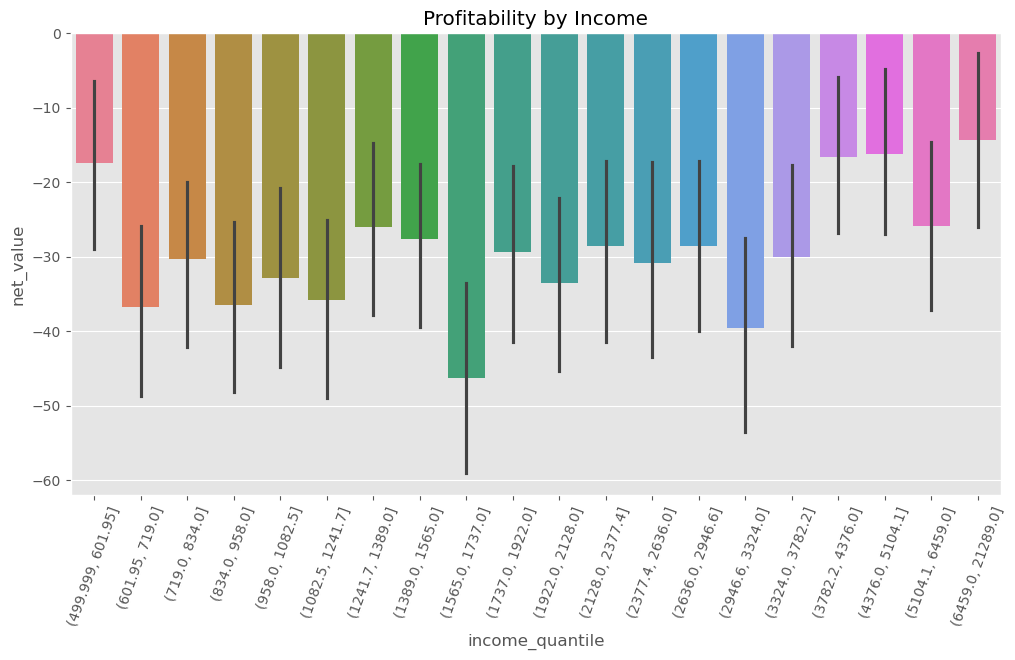

In [6]:
plt.figure(figsize=(12,6))## seed because the CIs from seaborn uses boostrap
np.random.seed(123)

# pd.qcut create quantiles of a column
sns.barplot(data=train.assign(income_quantile=pd.qcut(train["income"], q=20)), 
            x="income_quantile", y="net_value",
            hue="income_quantile", palette="husl", legend=False)

plt.title("Profitability by Income")
plt.xticks(rotation=70);

但遗憾的是，结果依然不理想。无论收入水平如何，所有分位组的客户其平均净值仍为负值。尽管高收入客户“没那么差”，即其平均亏损相对较小，但总体而言，他们仍然是亏损客户。因此，收入变量在这里并未帮到我们太多。

那我们不妨看看其他变量，比如地区（region）。如果我们的大部分成本来源于为偏远地区的客户提供服务，那么我们就可以合理地假设：**地区变量可能有助于区分盈利客户与非盈利客户**。

由于“地区”本身就是一个类别变量，我们不需要像收入那样进行分位处理。我们可以直接查看各地区的平均净值，看看是否存在某些地区客户更可能盈利。

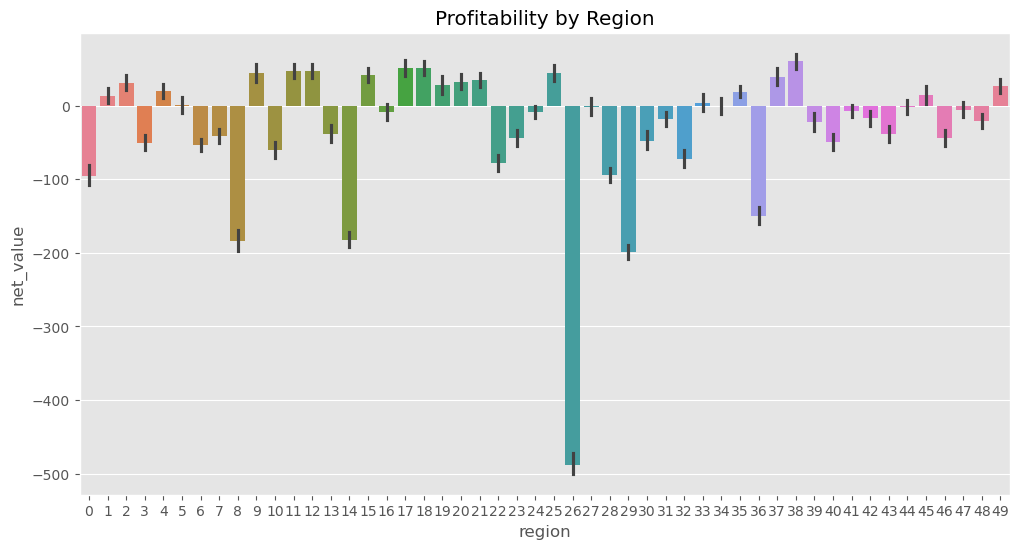

In [7]:
plt.figure(figsize=(12, 6))
np.random.seed(123)

region_plot = sns.barplot(data=train, x="region", y="net_value", 
    hue="region", palette="husl", legend=False         
                         )

plt.title("Profitability by Region");

太好了！从图中我们可以清楚地看到，一些地区是盈利的，比如地区 2、17、39；而另一些地区则是亏损的，比如地区 0、9、29，尤其是表现特别差的地区 26。这个结果非常有希望！我们可以据此制定一个简单的策略：只与数据显示为盈利的地区客户开展业务。

值得注意的是，我们现在所做的事情，其实本质上就是机器学习模型所做的，只不过方式更为简单——我们正在估计每个地区的条件期望值，即：

$$
E[\text{NetValue} \mid \text{Region}]
$$

接下来，我们需要基于这个估计结果构造一个策略。我们将采用一个非常简单的方法：为每个地区的平均净值构造一个 95% 的置信区间。如果该置信区间的下限大于 0，我们就认为该地区的客户是盈利的，并选择与之开展业务。

下面的代码构造了一个字典，其中键是地区编号，值是该地区净值期望的 95% 置信区间的下限。然后，我们筛选出所有下限大于零的地区。这些地区即为我们根据当前数据决定开展业务的地区。

In [8]:
# extract the lower bound of the 95% CI from the plot above
regions_to_net = train.groupby('region')['net_value'].agg(['mean', 'count', 'std'])

regions_to_net = regions_to_net.assign(
    lower_bound=regions_to_net['mean'] - 1.96*regions_to_net['std']/(regions_to_net['count']**0.5)
)

regions_to_net_lower_bound = regions_to_net['lower_bound'].to_dict()
regions_to_net = regions_to_net['mean'].to_dict()

# filters regions where the net value lower bound is > 0.
regions_to_invest = {region: net 
                     for region, net in regions_to_net_lower_bound.items()
                     if net > 0}

regions_to_invest

{1: 2.9729729729729737,
 2: 20.543302704837856,
 4: 10.051075065003388,
 9: 32.08862469914759,
 11: 37.434210420891255,
 12: 37.44213667009524,
 15: 32.09847683044394,
 17: 39.52753893574483,
 18: 41.86162250217046,
 19: 15.62406327716401,
 20: 22.06654814414531,
 21: 24.621030401718578,
 25: 33.97022928360584,
 35: 11.68776141117673,
 37: 27.83183541449011,
 38: 49.740709395699994,
 45: 2.286387928016998,
 49: 17.018537095350286}

变量 `regions_to_invest` 包含了我们决定要开展业务的所有地区。接下来，我们来看一下这个策略在测试集上的表现——也就是我们“假装没有见过”的那部分数据。

这一步是评估策略效果的关键。原因在于：某个地区在训练集中看起来是盈利的，可能仅仅是由于样本波动或偶然性。如果这种盈利表现只是随机出现的，那么我们很可能无法在测试集中观察到相同的规律。

为此，我们会将测试集中仅属于这些被判断为“盈利”的地区的客户筛选出来，然后绘制这些客户的净收益分布图，并计算我们策略对应的平均净收益。

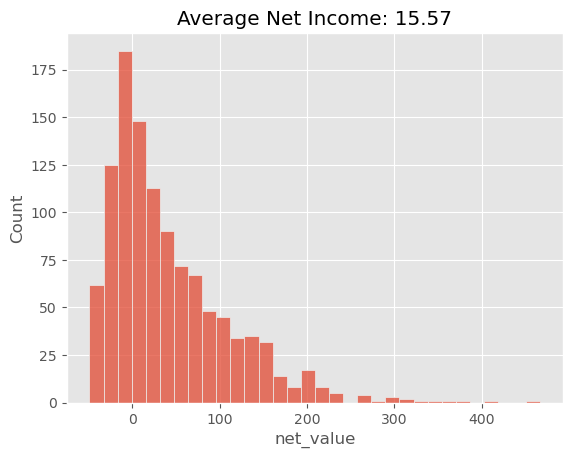

In [9]:
region_policy = (test[test["region"]
                      # filter regions in regions_to_invest
                      .isin(regions_to_invest.keys())]) 

sns.histplot(data=region_policy, x="net_value")
# average has to be over all customers, not just the one we've filtered with the policy
plt.title("Average Net Income: %.2f" % (region_policy["net_value"].sum() / test.shape[0]));

## 将机器学习模型用于决策输入

如果你希望进一步提升策略效果，现在我们可以借助机器学习的强大能力。当然，需要注意的是，这通常会显著增加建模复杂度，而实际提升可能只是边际上的。但在某些情况下，边际提升也可能转化为可观的收益，这正是机器学习在现实中广受重视的原因之一。

在这里，我们将使用一种名为梯度提升（Gradient Boosting）的模型。这类模型从原理上来说相对复杂，但使用起来其实非常方便。就我们的目的而言，并不需要深入其内部机制，只需要回忆在“机器学习速成课”中学到的内容：机器学习模型本质上是一个强大的预测工具，用于估计条件期望 $E[Y \mid X]$。模型越复杂，其拟合能力越强，但如果复杂度过高，就可能发生过拟合，学习到噪声，导致在新数据上表现不佳。因此，我们仍需使用交叉验证，确保模型复杂度合适。

那么，问题来了：**我们该如何利用这些更好的预测结果来改进我们之前基于地区的简单策略，从而更有效地识别并接触盈利客户？**

我认为这里有两个主要的改进点。第一，逐个变量地寻找能够区分盈利客户和非盈利客户的特征，其实是一个非常繁琐的过程。在本例中，我们只有三个变量（年龄、收入和地区），工作量还不算大，但如果有上百个变量，显然就难以操作。此外，这样做还容易引发[多重检验（multiple testing）](https://en.wikipedia.org/wiki/Multiple_comparisons_problem)问题和假阳性率偏高的问题。

第二点是，客户的盈利能力往往不是由单一变量决定的。在我们的例子中，除了地区变量以外，收入和年龄也可能包含关于客户价值的重要信息。虽然我们先前发现收入单独预测效果不强，但如果只在“略微亏损”的那些地区中考虑高收入客户，或许仍有可能实现盈利。换句话说，我们是在提出一个更强的预测结构：

$$
E[\text{NetValue} \mid \text{Region}, \text{Income}, \text{Age}] > E[\text{NetValue} \mid \text{Region}]
$$

这个思路是合理的：在已有的地区基础上，加入收入和年龄的信息，应该可以提高我们对客户净值的预测精度。

然而，构造这样更复杂的策略，尤其是涉及多个变量交互关系的策略，其组合数量将呈指数增长，很难手动完成。更可行的方式是：将所有特征变量输入机器学习模型，让模型自动学习这些变量之间的关系和交互项。这正是我们接下来要做的事情。

我们的目标是建立一个预测 `net_value` 的模型，使用的特征包括 `region`、`income` 和 `age`。其中，“地区”是一个类别变量，我们需要先将其转换为数值型。这里我们采用的方法是：将每个地区替换为它在训练集中的平均净值。还记得我们之前构造的 `regions_to_net` 字典吗？只需用 `.replace()` 方法将该字典传入即可。

由于我们将多次进行这种替换操作，接下来会将其封装成一个函数。这个过程属于机器学习中常说的**特征工程（feature engineering）**，也就是为了帮助模型学习而对原始变量进行转换与处理。



In [10]:
def encode(df): 
    return df.replace({"region": regions_to_net})

接下来，我们将从 [Sklearn](https://scikit-learn.org/stable/) 导入模型。Sklearn 中的所有模型都有非常标准的使用流程：

首先，需要实例化模型，并传入一些用于控制模型复杂度的参数。对于这个梯度提升模型，我们将设置估计器数量为 400，最大深度为 4，等等。一般来说，模型越深、估计器数量越多，模型的拟合能力就越强。当然，我们不能让模型过于强大，否则它可能会学习到训练数据中的噪声，即发生过拟合。

不过，你无需了解这些参数的具体含义，只要记住：这是一个预测性能很强的模型就足够了。

然后，要训练模型，只需调用 `.fit()` 方法，并将特征变量 `X` 和我们想要预测的因变量（即目标变量）`net_value` 作为输入即可。

In [11]:
model_params = {'n_estimators': 400,
                'max_depth': 4,
                'min_samples_split': 10,
                'learning_rate': 0.01,
                'loss': 'squared_error'}

features = ["region", "income", "age"]
target = "net_value"

np.random.seed(123)

reg = ensemble.GradientBoostingRegressor(**model_params)

# fit model on the training set
encoded_train = train[features].pipe(encode)
reg.fit(encoded_train, train[target]);

模型现在已经训练完成，接下来我们需要评估它的效果。为此，我们要查看该模型**在测试集上的预测表现**。

用于评估机器学习模型预测性能的指标有很多种。这里我们采用其中一个常用指标：$R^2$（决定系数）。我们不需要深入讨论其技术细节，简单理解即可：
$R^2$ 通常用于评估对连续变量的预测模型，比如 `net_value`。

值得注意的是，$R^2$ 的取值范围可以从负无穷到 1。如果模型的预测效果甚至比直接用平均值还差，$R^2$ 就会为负值；如果模型能够完美预测，则 $R^2 = 1$。

从直观上说，$R^2$ 表示模型能够解释 `net_value` 变异程度的比例。

In [12]:
train_pred = (encoded_train
              .assign(predictions=reg.predict(encoded_train[features])))

print("Train R2: ", r2_score(y_true=train[target], y_pred=train_pred["predictions"]))
print("Test R2: ", r2_score(y_true=test[target], y_pred=reg.predict(test[features].pipe(encode))))

Train R2:  0.7108790300152951
Test R2:  0.6938513063048141


在本例中，模型解释了训练集中约 71% 的 `net_value` 方差，而在测试集中只能解释约 69%。这是可以预期的：由于模型在训练时接触过训练集数据，其在该数据集上的表现往往会被高估。

顺带一提，如果你想更深入了解**过拟合（overfitting）**，可以尝试将模型的 `max_depth` 参数设为 14，然后观察结果。你很可能会发现训练集上的 $R^2$ 飙升，而测试集上的 $R^2$ 反而下降——这正是过拟合的典型表现。

接下来，为了制定我们的策略，我们将把模型在测试集上的预测结果存储在一个名为 `prediction` 的新列中。这个预测值即为条件期望的估计：

$$
\hat{E}[\text{NetValue} \mid \text{Age}, \text{Income}, \text{Region}]
$$

In [13]:
model_policy = test.assign(prediction=reg.predict(test[features].pipe(encode)))

model_policy.head()

,customer_id,region,income,age,net_value,prediction
5952,5952,19,1983,23,21,47.734883
1783,1783,31,914,31,-46,-36.026935
4811,4811,33,1349,25,-19,22.553420
145,145,20,1840,26,55,48.306256
7146,7146,19,3032,34,-17,7.039414


就像我们之前对 `region` 变量所做的那样，我们也可以根据模型的预测值来查看平均净值的分布。但由于模型预测结果是连续变量而不是类别变量，我们需要先将其**离散化**。

一种常用的做法是使用 pandas 中的 `pd.qcut` 函数（说实话，我非常喜欢这个函数！）。它可以根据模型的预测值将数据按分位数进行分组。

我们这里使用 50 个分位组，主要是因为我们之前的 `region` 变量正好也有 50 个取值。作为一种惯例，我倾向于将这些由模型预测值分组得到的分位组称为**模型带（model bands）**，这个称呼更直观地反映了：每个分组内的预测值落在某一个区间范围内，比如从 -10 到 200。

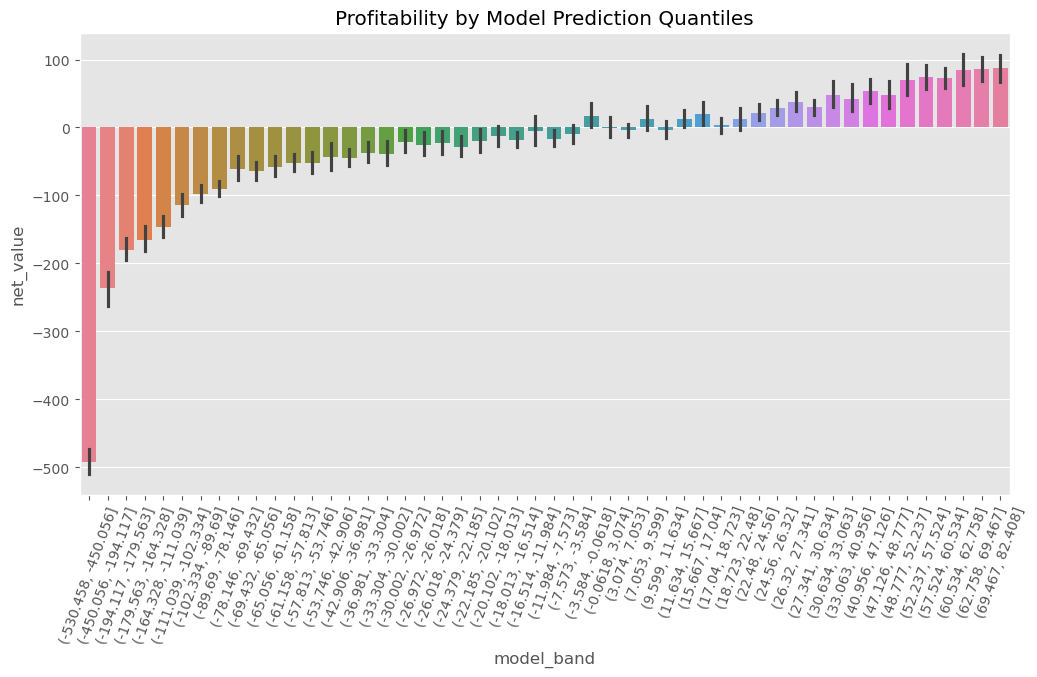

In [14]:
plt.figure(figsize=(12,6))

n_bands = 50
bands = [f"band_{b}" for b in range(1,n_bands+1)]

np.random.seed(123)
model_plot = sns.barplot(data=model_policy
                         .assign(model_band = pd.qcut(model_policy["prediction"], q=n_bands)),
                         x="model_band", y="net_value",
                         hue="model_band", palette="husl", legend=False  
                        )
plt.title("Profitability by Model Prediction Quantiles")
plt.xticks(rotation=70);

我们可以观察到，有些模型带的净值非常为负，而另一些则非常为正；还有一些模型带的净值则处于不确定状态——我们无法明确判断其为正还是为负。

此外，值得注意的是，从左到右，净值呈现出上升趋势。这是符合预期的：既然我们是在预测净值，那么预测值越高，实际净值也应该相应更高，二者应具有一定的正相关关系。

现在，为了将基于机器学习模型的策略与我们之前仅使用地区变量的策略进行比较，我们可以绘制净收益的直方图，并同时展示测试集上的总净收益。

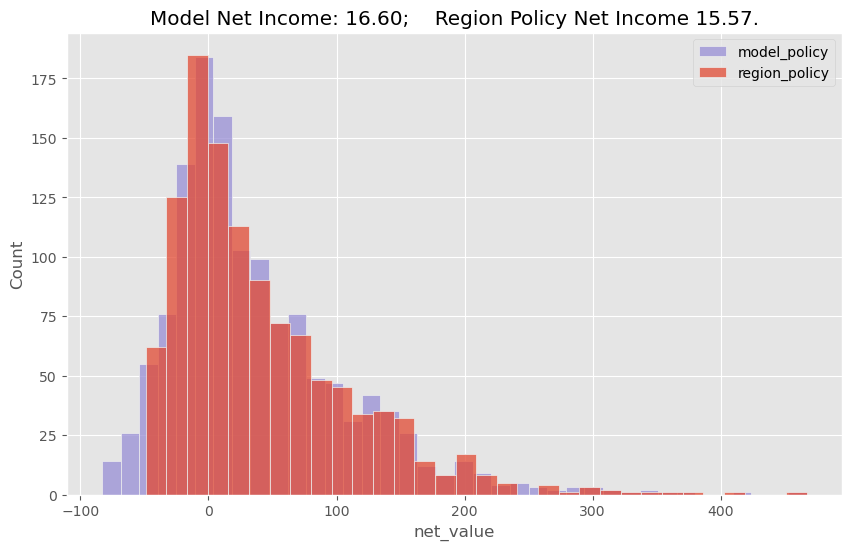

In [15]:
plt.figure(figsize=(10,6))
model_plot_df = (model_policy[model_policy["prediction"]>0])
sns.histplot(data=model_plot_df, x="net_value", color="C2", label="model_policy")

region_plot_df = (model_policy[model_policy["region"].isin(regions_to_invest.keys())])
sns.histplot(data=region_plot_df, x="net_value", label="region_policy")

plt.title("Model Net Income: %.2f;    Region Policy Net Income %.2f." % 
          (model_plot_df["net_value"].sum() / test.shape[0],
           region_plot_df["net_value"].sum() / test.shape[0]))
plt.legend();

正如我们所看到的，机器学习模型确实构建出了一个比仅使用 `region` 特征更优的策略，但提升幅度不大。在测试集中，模型策略为每位客户带来的平均净收益约为 16.6 雷亚尔，而基于地区的策略仅为 15.5 雷亚尔。虽然差距不大，但如果客户数量非常庞大，这种边际提升已经足以证明使用机器学习模型的合理性。

## 更精细化的策略

回顾一下，我们目前为止测试了几种策略：

1. 最简单的策略是与所有客户合作，这相当于估计边际净收益：

   $$
   \hat{E}[\text{NetValue}] > 0
   $$

   由于这种策略的平均每客户净收益为负，因此效果不佳。

2. 接着我们尝试了一个基于单一特征的策略，即基于地区信息做决策：只在特定地区开展业务，对应形式为：

   $$
   \hat{E}[\text{NetValue} \mid \text{Region}] > 0
   $$

   这一策略带来了显著改进。

3. 然后我们引入机器学习，使用所有特征变量建立预测模型，对应表达为：

   $$
   \hat{E}[\text{NetValue} \mid \text{Region}, \text{Income}, \text{Age}] > 0
   $$

   基于这个模型，我们制定了策略：只与预测净值为正的客户开展合作。

上述所有策略的决策逻辑都是二元的：是否与客户建立合作关系。这类策略通常可以表达为如下形式：

```python
if prediction > 0:
    do business
else:
    don’t do business
```

这种策略被称为**阈值策略（thresholding）**：当预测值超过某个阈值（在本例中是 0）时采取某一行动，否则采取另一行动。

阈值策略在很多实际场景中都适用，尤其当决策是二元选择时非常有效。例如在交易欺诈识别中，如果欺诈模型的预测得分高于某个阈值 X，则拒绝交易，否则批准。

然而，在某些情况下，决策可能并不是简单的“做”或“不做”，而是程度型或连续型决策。例如，你可能愿意对预计特别盈利的客户投入更多营销预算，甚至将他们加入“重点客户名单”，给予额外服务（虽然这也意味着更高的服务成本）。

一旦考虑这种情况，决策就从**二元选择**转向**连续选择**：你不只是决定是否与客户合作，还要决定在每位客户身上投入多少资源。

下面这个示例中，假设你的决策不再是“是否合作”，而是“对每位客户应投入多少营销预算”。再进一步，假设你正与其他公司竞争——谁在某位客户身上花的营销费最多，谁就赢得该客户（类似于竞价机制）。那么，合理的策略是：**对高盈利客户投入多、对边际盈利客户投入少、对亏损客户不投入**。

实现该策略的一种方式是：将预测值离散化为分组（band）。我们之前已经使用过类似的方法来对预测结果进行可视化，但这次我们将它用于实际决策。

我们将把预测结果划分为 20 个分组，可以理解为 20 个分位组或等大小的客户群。第 1 组将包含预测净值最低的 5% 客户，第 2 组包含第 5% 到第 10% 的客户……而第 20 组则包含预测净值最高的客户。

请注意：分组边界必须基于训练集来确定，然后才能将其应用于测试集。因此，我们会使用 `pd.qcut` 在训练集上计算出这些分组边界（bins），接着用 `np.digitize` 将测试集中的预测值分配到对应的分组中。

In [16]:
def model_binner(prediction_column, bins):
    # find the bins according to the training set
    bands = pd.qcut(prediction_column, q=bins, retbins=True)[1]
    
    def binner_function(prediction_column):
        return np.digitize(prediction_column, bands)
    
    return binner_function
    

# train the binning function
binner_fn = model_binner(train_pred["predictions"], 20)

# apply the binning
model_band = model_policy.assign(bands = binner_fn(model_policy["prediction"]))
model_band.head()

,customer_id,region,income,age,net_value,prediction,bands
5952,5952,19,1983,23,21,47.734883,18
1783,1783,31,914,31,-46,-36.026935,7
4811,4811,33,1349,25,-19,22.553420,15
145,145,20,1840,26,55,48.306256,18
7146,7146,19,3032,34,-17,7.039414,13


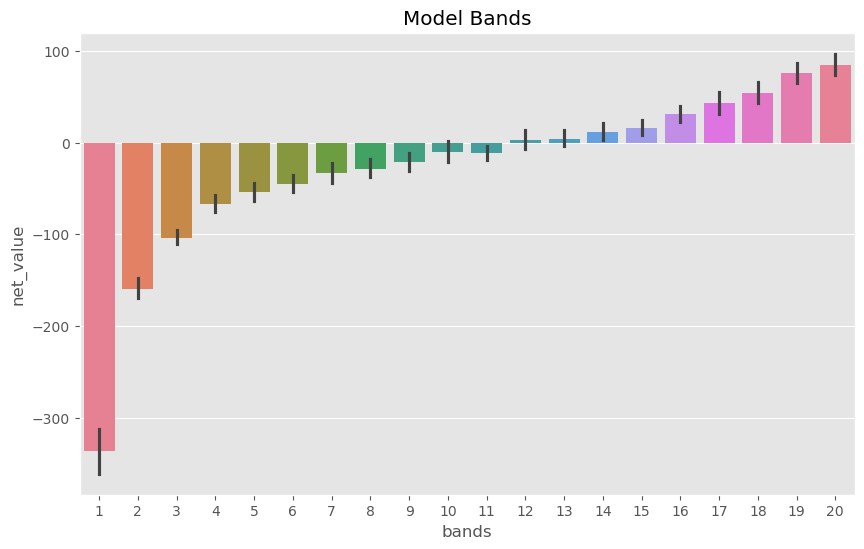

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=model_band, x="bands", y="net_value", hue="bands", palette="husl", legend=False )
plt.title("Model Bands");

有了这些分组（bands），我们就可以将大部分的营销预算集中投放在第 19 和第 20 组客户身上。请注意，我们的决策模式已经从最初的**二元选择（是否合作）**，演变为一个**连续决策问题**：即**对每位客户应投入多少营销资源**。

当然，你可以通过增加分组数量进一步细化策略；在极限情况下，甚至可以**不再进行分组**，而是**直接使用模型的预测值作为投资决策的依据**。比如：

```python
mkt_investments_i = model_prediction_i * 0.3
```

也就是说，对于每位客户 $i$，我们按照模型预测的净值投入其中 30% 的营销预算（这里的 30% 只是一个示意性的参数，具体数值可以根据实际情况调整）。

## 核心要点

在非常短的时间内，我们已经覆盖了大量内容，因此这一总结非常有必要，帮助我们理清目前的进展。

首先，我们学习了机器学习的大多数应用，其核心只是围绕一个目标：做出高质量的预测。所谓预测，可以理解为：从一个已知的输入变量，映射到一个起初未知但定义明确的输出变量。这种预测本质上就是估计条件期望函数 $E[Y \mid X]$。

当然，说“仅仅是做预测”可能并不完全公平。我们也看到了，良好的预测能够帮助我们解决许多超出直觉的问题，例如语言翻译、自动驾驶等。

随后，我们回到更贴近现实的商业应用场景，探讨了如何通过预测客户的盈利能力，制定谁值得我们投入资源、谁不值得的策略。具体而言，我们尝试预测客户净收益，并基于该预测值建立相应的策略。这只是预测模型的一个应用示例，类似的还有信用评分、欺诈检测、癌症诊断等领域——只要预测有用，机器学习就能发挥作用。

本章的核心结论是：

> **只要你能将一个业务问题表述为一个预测问题，那么机器学习很可能就是解决它的最佳工具。**

我必须特别强调这一点。在当前机器学习被大量炒作的背景下，人们常常忽略了这一基本原则，反而投入大量精力构建一些预测能力很强、但对实际业务无用的模型。

正确的顺序应当是：**先思考如何将业务问题转化为预测问题，然后再用机器学习工具去解决它**。而不是反过来：先构建一个预测模型，再去寻找有没有哪个业务问题能“凑合用”这个模型。后一种方式偶尔可能奏效，但更多时候只是“盲目试错”，最终变成“为了解决模型而找问题”的局面。

## 参考说明

本章内容大多是我个人的经验总结，很多观点和方法来自于我的实务体会。因此，我无法为这些内容提供严格意义上的学术参考文献。这也意味着，这些内容尚未经过系统性的学术审查，不像正规科研工作那样经过同行评议与理论论证。你也许会注意到，我在这里主要谈论的是“在实践中有效的方法”*，而没有花太多篇幅去解释其背后的理论基础。这可以被看作是一种“来自一线的经验科学”（a sort of science from the streets）。不过，既然我将这部分内容公开发布，自然也欢迎所有人的批评与反馈——如果你发现其中有明显错误或不妥之处，非常欢迎你提交 issue，我会尽我所能给予回应。

最后，我也意识到，对于那些希望系统学习机器学习的读者来说，我在本章的讲解可能过于简略了。坦率地说，我认为自己真正能够贡献价值的领域，是因果推断的教学，而非机器学习。后者已经有大量优质的公开资源，远远超过我所能提供的内容。其中的经典之作，就是 [Andrew Ng 的机器学习课程](https://www.coursera.org/learn/machine-learning)，如果你是机器学习初学者，我强烈推荐你去认真学习这门课程。

## 参与贡献

**《Causal Inference for the Brave and True》** 是一本关于因果推断的开源教材，致力于以经济上可负担、认知上可理解的方式，普及这门“科学的统计基础”。全书基于 Python，仅使用自由开源软件编写，原始英文版本由 [Matheus Facure](https://github.com/matheusfacure) 编写与维护。

本书的中文版由黄文喆与许文立教授合作翻译，并托管在 [GitHub 中文主页](https://github.com/Wenzhe-Huang/python-causality-handbook-zh)。希望本地化的内容能帮助更多中文读者学习和掌握因果推断方法。

如果你觉得这本书对你有帮助，并希望支持该项目，可以前往 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true) 支持原作者。

如果你暂时不方便进行经济支持，也可以通过以下方式参与贡献：

* 修正错别字
* 提出翻译或表达建议
* 反馈你未能理解的部分内容

欢迎前往英文版或中文版仓库点击 [issues 区](https://github.com/matheusfacure/python-causality-handbook/issues) 或 [中文版 issues 区](https://github.com/Wenzhe-Huang/python-causality-handbook-zh/issues) 提出反馈。

最后，如果你喜欢这本书的内容，也请将其分享给可能感兴趣的朋友，并为项目在 GitHub 上点亮一颗星：[英文版仓库](https://github.com/matheusfacure/python-causality-handbook) / [中文版仓库](https://github.com/Wenzhe-Huang/python-causality-handbook-zh)。
